<img src="images/cjava.jpg" alt='cjava' style="width:300px;"/>

# Introduccion a SymPy

![SymPy](http://sympy.org/static/images/logo.png)

__SymPy es una biblioteca de Python para matemática simbólica__. Apunta a convertirse en un sistema de algebra computacional (__CAS__) con todas sus prestaciones manteniendo el código tan simple como sea posible para manterlo comprensible y fácilmente extensible. SymPy está __escrito totalmente en Python y no requiere bibliotecas adicionales__. _Este proyecto comenzó en 2005, fue lanzado al público en 2007 y a él han contribuido durante estos años cientos de personas._

_ Otros CAS conocidos son Mathematica y Maple, sin embargo ambos son software privativo y de pago. [Aquí](https://github.com/sympy/sympy/wiki/SymPy-vs.-Maple) puedes encontrar una comparativa de SymPy con Maple. _

Hoy veremos cómo:

* Crear símbolos y expresiones.
* Manipular expresiones (simplificación, expansión...)
* Calcular derivadas e integrales.
* Límites y desarrollos en serie.
* Resolución de ecuaciones.
* Resolción de EDOs.
* Matrices

Sin embargo, SymPy no acaba aquí ni mucho menos...


In [140]:
from IPython.display import HTML
HTML('<iframe src="http://docs.sympy.org/latest/index.html" width="700" height="400"></iframe>')

C:\Users\jnieto\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Sympy Gamma   

In [141]:
HTML('<iframe src="http://www.sympygamma.com/input/?i=integrate%281+%2F+%281+%2B+x^2%29%29" width="700" height="400"></iframe>')

# Creación de símbolos

In [142]:
from sympy import init_session

In [143]:
init_session(use_latex=True)

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



In [144]:
from sympy import init_printing

In [145]:
init_printing()

In [146]:
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, simplify, expand, factor, collect,
                   apart, cancel, expand_trig, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N)

# Símbolo que no hemos creado

In [147]:
a = 2 * b

# Creamos el simbolo A

In [148]:
a = symbols('a')

In [149]:
a

In [150]:
(a + pi) ** 2

# Unidad Imaginaria

In [151]:
a + 2*I

In [152]:
E

In [153]:
type(a)

sympy.core.symbol.Symbol

In [154]:
b = 2*a

In [155]:
b

In [156]:
type(b)

sympy.core.mul.Mul

In [157]:
b = 2.0

In [158]:
type(b)

float

# Creación de símbolos

In [159]:
alpha, beta, omega = symbols('alpha, beta, omega')

In [160]:
alpha, beta, omega 

In [161]:
c_t = symbols('c_t')

In [162]:
c_t

In [163]:
w = symbols('omega')
W = symbols('Omega')

In [164]:
w

In [165]:
W

In [166]:
W,w

# Crear símbolos reales

In [167]:
x, y, z, t = symbols('x, y, z, t')
x, y, z, t 

In [168]:
x.assumptions0

{'commutative': True}

In [169]:
x = symbols('x', real = True, positive = True)

In [170]:
x.assumptions0

{'real': True,
 'extended_real': True,
 'imaginary': False,
 'infinite': False,
 'hermitian': True,
 'complex': True,
 'finite': True,
 'commutative': True,
 'positive': True,
 'zero': False,
 'nonnegative': True,
 'nonpositive': False,
 'extended_positive': True,
 'extended_nonpositive': False,
 'extended_nonnegative': True,
 'negative': False,
 'nonzero': True,
 'extended_negative': False,
 'extended_nonzero': True}

Comencemos por crear una expresión como: $\cos(x)^2+\sin(x)^2$

In [171]:
expr = cos(x)**2 + sin(x)**2

In [172]:
expr

# Simplificar expresiones

In [173]:
simplify(expr)

In [174]:
sqrt(z**2)

In [175]:
y = symbols('y', positive = True)

In [176]:
simplify(sqrt(y**2))

In [177]:
expr

In [178]:
expr.subs(x, y**2)

In [179]:
expre2 = (sin(x) **2 + cos(y) ** 2)

In [180]:
expre2

In [181]:
expre2.subs({x:1+z, y:1-z})

# Cambiar el sin(x) por el exp(x)

In [182]:
sin(x).replace(sin, exp)

In [183]:
sin(90)

In [184]:
(sin(x) + 3 * x).subs(x, pi)

In [185]:
(sin(x) + 3 * x).subs(x, pi).evalf(25)
# extraer valor numerico y aproximar

In [186]:
(sin(x) + 3 * x).subs(x, pi).evalf(2)

In [187]:
N(pi, 25) # numero de decimales

In [188]:
N(pi, 50)

# Simplificacion

__Crea las expresiones de la izquierda y averigua qué función te hace obtener la de la derecha:__

expresión 1| expresión 2
:------:|:------:
$\left(x^{3} + 3 y + 2\right)^{2}$    |    $x^{6} + 6 x^{3} y + 4 x^{3} + 9 y^{2} + 12 y + 4$
$\frac{\left(3 x^{2} - 2 x + 1\right)}{\left(x - 1\right)^{2}} $ | $3 + \frac{4}{x - 1} + \frac{2}{\left(x - 1\right)^{2}}$
$x^{3} + 9 x^{2} + 27 x + 27$         |    $\left(x + 3\right)^{3}$
$\sin(x+2y)$                          |    $\left(2 \cos^{2}{\left (y \right )} - 1\right) \sin{\left (x \right )} + 2 \sin{\left (y \right )} \cos{\left (x \right )} \cos{\left (y \right )}$


# Expand 

In [189]:
expr1 = (x**3 + 3*y + 2)**2
expr1

In [190]:
expr1_exp = expr1.expand()
expr1_exp

# Apart 

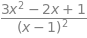

In [191]:
expr2 = (3 * x ** 2 - 2 * x + 1) / (x - 1) ** 2
expr2

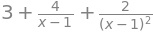

In [192]:
expr2_apart = expr2.apart()
expr2_apart

# Factor

In [193]:
expr3 = x ** 3 + 9 * x ** 2 + 27 * x + 27
expr3

In [194]:
expr3_factor = expr3.factor()
expr3_factor

In [195]:
# factor? : Documentar funcion factor

# EXPAND_TRIG

In [196]:
expr4 = sin(x+2*y)
expr4

In [197]:
expr4_expand = expand_trig(expr4)
expr4_expand

In [198]:
#para documentar funciones, agregar a una funcion al final el simbolo ?

In [202]:
# expand? 

# Derivadas e integrales

In [203]:
expr = cos(x)

In [204]:
diff(expr)

In [205]:
expr.diff(x , x, x) # 3 derivadas seguidas

In [206]:
expr.diff(x,3) # otra forma de sacar 3era derivada

In [207]:
expr_xy = y ** 3 * sin(x) ** 2 + x ** 2 * cos(y)
expr_xy

In [208]:
diff(expr_xy,x,2,y)

In [209]:
F = Function('F')

In [210]:
F(x)

In [211]:
G = Function('G')

In [212]:
G(x)

In [213]:
Function?

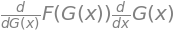

In [214]:
F(G(x)).diff(x)

In [215]:
f = 2 * y * exp(x)
f

In [216]:
g = f **2 * cos(x) + f
g

In [217]:
diff(g,x)

# Integrales

__Si te digo que se integra usando el método `.integrate()` o la función `integrate()`__. ¿Te atreves a integrar estas casi inmediatas...?:

$$\int{\cos(x)^2}dx$$
$$\int{\frac{dx}{\sin(x)}}$$
$$\int{\frac{dx}{(x^2+a^2)^2}}$$


In [218]:
int1 = cos(x)**2
int1

In [219]:
integrate(int1)

In [220]:
int1 = cos(x) **2
int1

In [221]:
integrate(int1,(x, 0, 1))

In [222]:
int2 = 1/sin(x)
int2

In [227]:
integrate(int2)

In [228]:
x, a = symbols('x a', real=True)

In [229]:
(x,a)

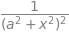

In [230]:
int3 = 1 / (x**2 + a**2)**2
int3

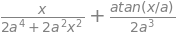

In [231]:
integrate(int3, x)

# Limites

In [232]:
expr = (x / tan(x)) ** (1 / x**2)
expr

In [233]:
limit(expr, x,0)

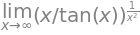

In [234]:
limit(expr, x, oo)  # oo es equivalente al simbolo infinito

# Series

In [236]:
expr = exp(x)
expr

In [237]:
series(expr)

In [238]:
series(expr,n=20)

# Resolucion de ecuaciones

In [240]:
ecuacion = Eq(x ** 2 - x, 3)
ecuacion

In [241]:
Eq(x ** 2 - x -3)

C:\Users\jnieto\anaconda3\lib\site-packages\sympy\core\relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


In [242]:
solve(ecuacion) # para resolver ecuaciones

In [254]:
eq1 = x**2 + 6*x - 7
eq1


In [255]:
solve(eq1)